In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015.0,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985.0,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017.0,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015.0,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015.0,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
common_movies = titles.groupby(['title'])

In [6]:
common_movies ['title'].count().sort_values(ascending = False).head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    11
The Three Musketeers    11
Freedom                 11
Othello                 11
Temptation              11
Kismet                  11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
release_date = titles[titles['year'].between(1930, 1939, inclusive = True)].groupby(['year'])

In [8]:
release_date.count().sort_values(['title'],ascending = False).head(3)

,title
year,
1937,1194
1936,1139
1938,1127


### Plot the number of films that have been released each decade over the history of cinema.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

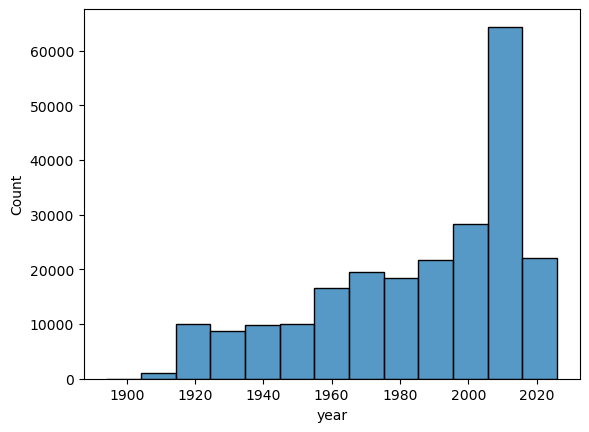

In [10]:
df = titles.groupby(['year', 'title']).count().reset_index()
sns.histplot(data=df, x='year', bins=int((df['year'].max() - df['year'].min()) / 10))

plt.show()

### Plot the number of "Hamlet" films made each decade.

In [11]:
hamlet_film = titles [titles['title'] == "Hamlet"].groupby (['year', 'title']).count().reset_index()

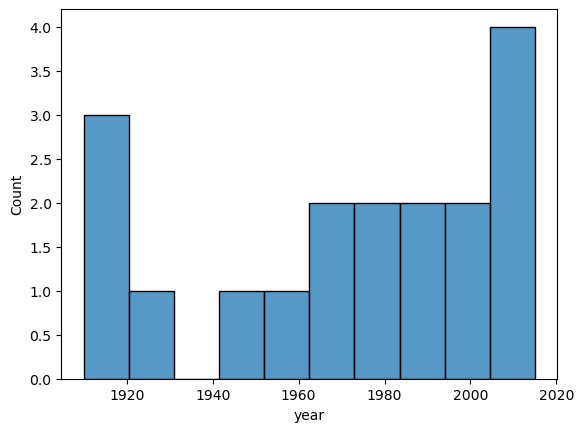

In [12]:
sns.histplot(data = hamlet_film, x = 'year', bins=int((hamlet_film['year'].max() - hamlet_film['year'].min()) / 10))
plt.show()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [13]:
rustler = cast [cast['character'] == "Rustler"].groupby(['character', 'year']).count().reset_index()

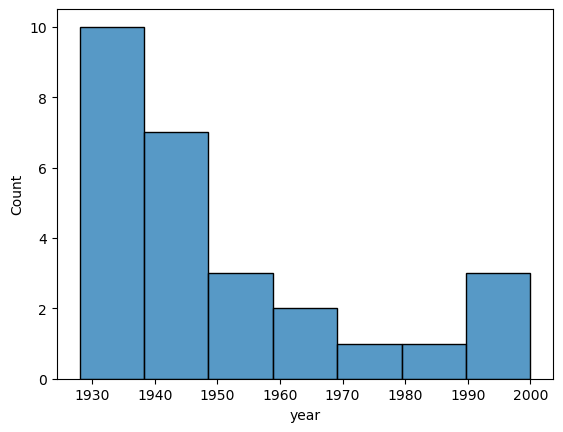

In [14]:
sns.histplot(data = rustler, x = 'year', bins=int((rustler['year'].max() - rustler['year'].min()) / 10))
plt.show()

### Plot the number of "Hamlet" characters each decade.

In [15]:
hamlet_ch = cast [cast ['character'] == "Hamlet"].groupby (['year', 'character', 'title']).count().reset_index()

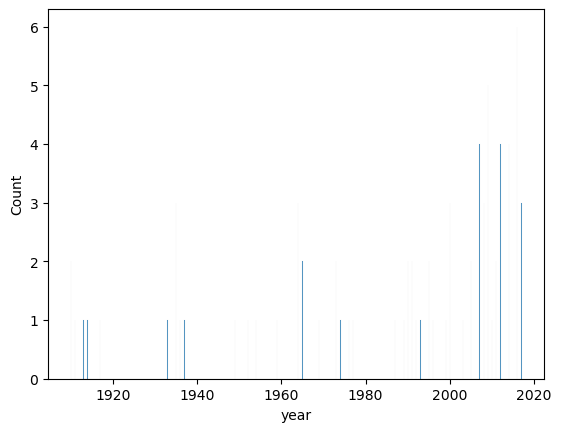

In [16]:
sns.histplot(data = hamlet_ch, x = 'year', bins = int((hamlet_ch['year'].max())-(hamlet_ch['year'].min())/10))
plt.show()

### What are the 11 most common character names in movie history?

In [17]:
common_character = cast.groupby(['character'])

In [18]:
common_character['character'].count().sort_values(ascending = False).head(11)

character
Himself      17396
Policeman     6158
Doctor        5922
Extra         5625
Reporter      5516
Townsman      5065
Bartender     5055
Waiter        4662
Henchman      4309
Dancer        4110
Soldier       3901
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [19]:
herself = cast[cast['character'] == "Herself"].groupby('name')

In [20]:
herself['name'].count().sort_values(ascending = False).head(10)

name
Aleli Estrada          1
Salsa Katanga          1
Najja Meeks            1
Nelly Diener           1
Nicole Sclafani        1
Parish Rahbar          1
Paulina Pita Macias    1
Pussy Riot             1
Rebecca Hudson         1
Ren? Biaggi            1
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [21]:
himself = cast[cast['character'] == "Himself"].groupby('name')

In [22]:
himself['name'].count().sort_values(ascending = False).head(10)

name
Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
Winston Churchill        23
George W. Bush           23
Ron Jeremy               23
Benito Mussolini         22
Franklin D. Roosevelt    20
Bill Clinton             20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [23]:
actor = cast[(cast['year'] == 1945) & ((cast['type'] == 'actor') | (cast['type'] == 'actress'))]
actor = actor.groupby('name')

In [24]:
actor['name'].count().sort_values(ascending = False).head(10)

name
Sam (II) Harris     32
Harold Miller       29
Frank O'Connor      27
Nolan Leary         27
Franklyn Farnum     26
Larry Steers        25
Tom London          24
Charles Sullivan    24
Edmund Cobb         24
Herman Hack         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [25]:
actor_1985 = cast[(cast['year'] == 1985) & ((cast['type'] == "actor")| (cast['type'] == "actress"))]
actor_1985 = actor_1985.groupby('name')

In [26]:
actor_1985['name'].count().sort_values(ascending = False).head(10)

name
Shakti Kapoor     21
Mammootty         21
Raj Babbar        15
Mohanlal          15
Lou Scheimer      15
Rajesh Khanna     13
Asrani            13
Jagdish Raj       12
Pinchoo Kapoor    12
Om Shivpuri       12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [27]:
Mammootty = cast[cast['name'] == "Mammootty"].groupby(['character', 'year']).count().reset_index()

<Figure size 800x600 with 0 Axes>

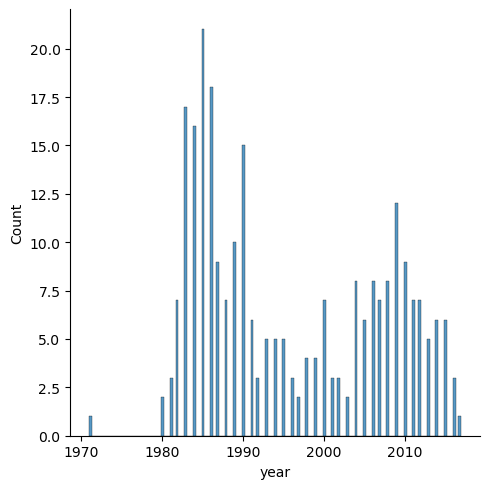

In [28]:
plt.figure(figsize = (8,6))
sns.displot(data = Mammootty, x = 'year', bins = int(cast['year'].max()-cast['year'].min()))
plt.show()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [29]:
patron = cast[cast['character'].astype(str).str.contains("Patron in")].groupby('character')

patron['character'].count().sort_values(ascending = False).head(10)

character
Patron in Frisky Rabbit         7
Patron in Billiard Parlor       5
Patron in Chinese Restaurant    5
Patron in Club                  3
Patron in the Coffee House      3
Patron in booth                 2
Patron in Coffee Shop           2
Busted Patron in Raid           2
Patron in restaurant            2
Patron in Bar                   2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [30]:
science = cast[cast['character'].astype(str).str.contains("Science")].groupby("character")

In [31]:
science ['character'].count().sort_values(ascending = False).head(10)

character
Science Teacher                            33
Science Student                             8
Science Fair Student                        5
Science Club Member                         5
Science Reporter                            5
Science Kid                                 4
The Science Fair Contestants & Families     3
Science Fair Judge                          3
Science                                     3
Member of 'Science Fucktion'                3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [32]:
judi_dench = cast[cast['name'].astype(str).str.contains (" Dench")]

In [33]:
judi_dench

,title,year,name,type,character,n
551898,Star Wars: Episode III - Revenge of the Sith,2005.0,Axel Dench,actor,Wookiee,51.0
551899,Flood Tide,1934.0,Bertram Dench,actor,Charles Tupper,11.0
551900,Waltzes from Vienna,1934.0,Bertram Dench,actor,Engine driver,NaN
551901,First Knight,1995.0,Jeffery Dench,actor,Elder,26.0
551902,Ice-Capades Revue,1942.0,Robert Dench,actor,Ice-Capades Skater,16.0
551903,The Mountain,1935.0,Sydney Dench,actor,John Rodgers,NaN
551904,The Gateway Meat,2008.0,Zack Dench,actor,Zack the Drugdealer,NaN
551905,A Different Loyalty,2004.0,Kliment Denchev,actor,Russian Doctor,50.0
551906,A Year in the Death of Jack Richards,2004.0,Kliment Denchev,actor,Polish Man,6.0
551907,Baseynat,1977.0,Kliment Denchev,actor,Bufo,3.0


### Plot the n-values of Cary Grant's roles through his career.

In [34]:
cary = cast[cast['name'] == "Cary Grant"]

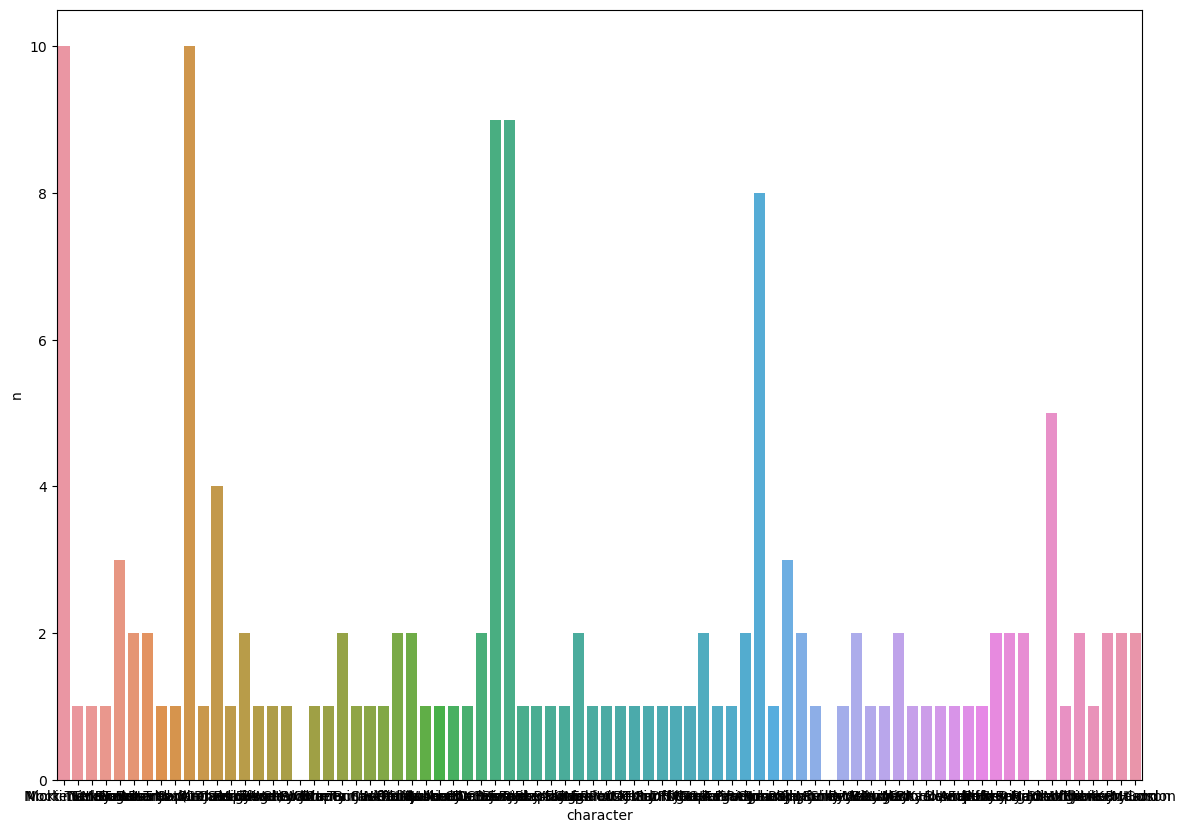

In [35]:
plt.figure(figsize = (14,10))
sns.barplot(data = cary, x = 'character', y = 'n')
plt.show()

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [36]:
poitier = cast[cast['name'] == "Sidney Poitier"]

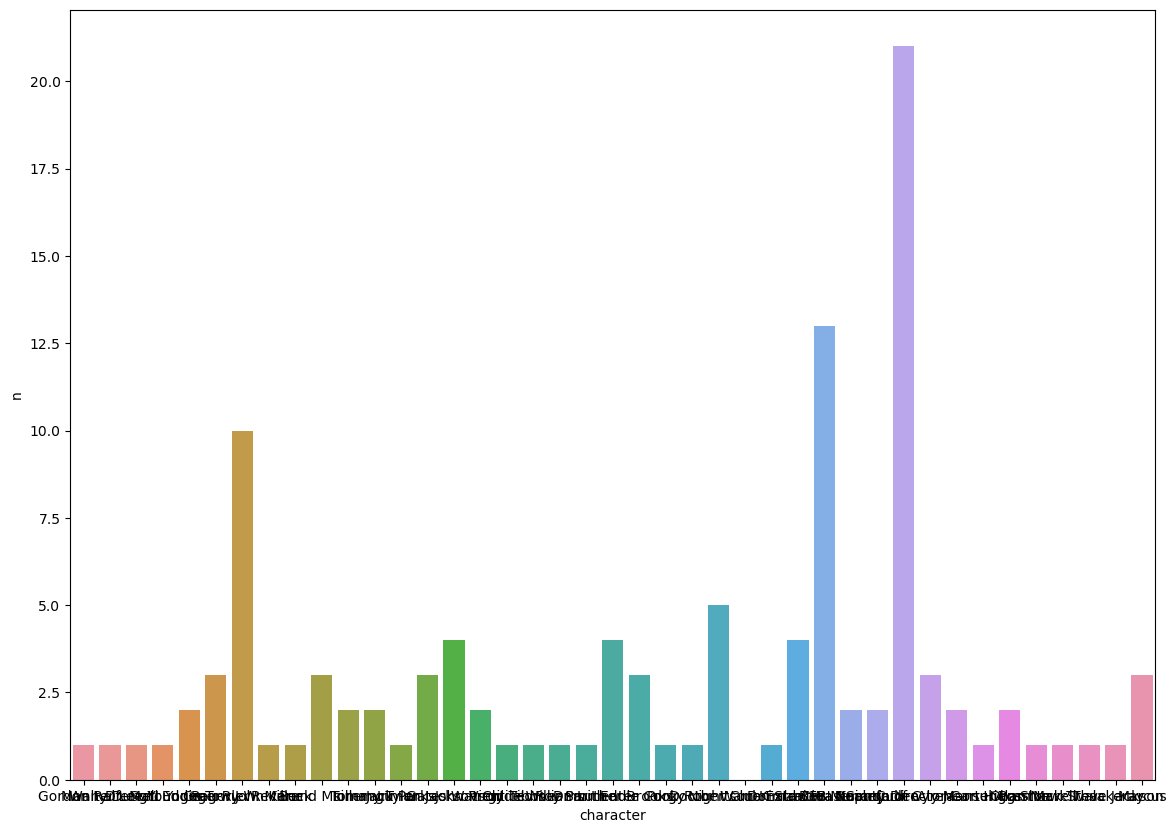

In [37]:
plt.figure(figsize = (14,10))
sns.barplot(data = poitier, x = 'character', y = 'n')
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [38]:
leading_role = cast[(cast['n'] ==1) & (cast['type'] == "actor") & (cast["year"].between (1950, 1959, inclusive = True))].shape[0]

In [39]:
print("The number of leading roles were available to actors in 1950s: ", leading_role)

The number of leading roles were available to actors in 1950s:  5910


In [40]:
leading_actress = cast[(cast['n'] ==1) & (cast['type'] =="actress") & (cast["year"].between(1950,1959, inclusive = True))].shape[0]

In [41]:
print("The number of leading roles were available to actress in 1950s: ", leading_actress)

The number of leading roles were available to actress in 1950s:  0


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
leading_role_2 = cast[(cast['n'] ==2) & (cast['type'] == "actor") & (cast["year"].between (1950, 1959, inclusive = True))].shape[0]
print("The number of leading roles were available to actors in 1950s: ", leading_role_2)

The number of leading roles were available to actors in 1950s:  4117


In [43]:
leading_role_actress_2 = cast[(cast['n'] ==2) & (cast['type'] == "actress") & (cast["year"].between (1950, 1959, inclusive = True))].shape[0]
print("The number of leading roles were available to actors in 1950s: ", leading_role_actress_2)

The number of leading roles were available to actors in 1950s:  0
